<a href="https://colab.research.google.com/github/Anurag928/Data-Analysis-Projects/blob/main/Covid_19_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv('/content/covid_19_clean_complete.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.head()


/usr/local/lib/python3.11/dist-packages/google/colab/_dataframe_summarizer.py:57: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(column, errors="raise")


,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0.0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0.0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0.0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0.0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0.0,Africa


In [ ]:
df.rename(columns={'Country/Region': 'Country'}, inplace=True)
df = df.groupby(['Date', 'Country'])[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()


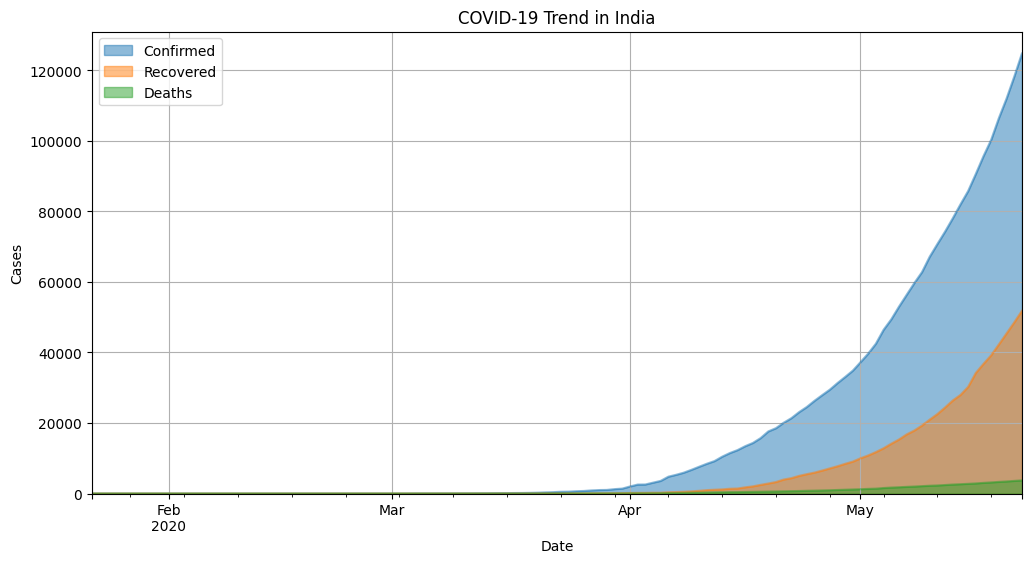

In [ ]:
country = 'India'
india_df = df[df['Country'] == country].groupby('Date')[['Confirmed', 'Recovered', 'Deaths']].sum().reset_index()
india_df.plot(x='Date', kind='area', stacked=False, figsize=(12,6), alpha=0.5)
plt.title(f'COVID-19 Trend in {country}')
plt.ylabel('Cases')
plt.grid(True)
plt.show()


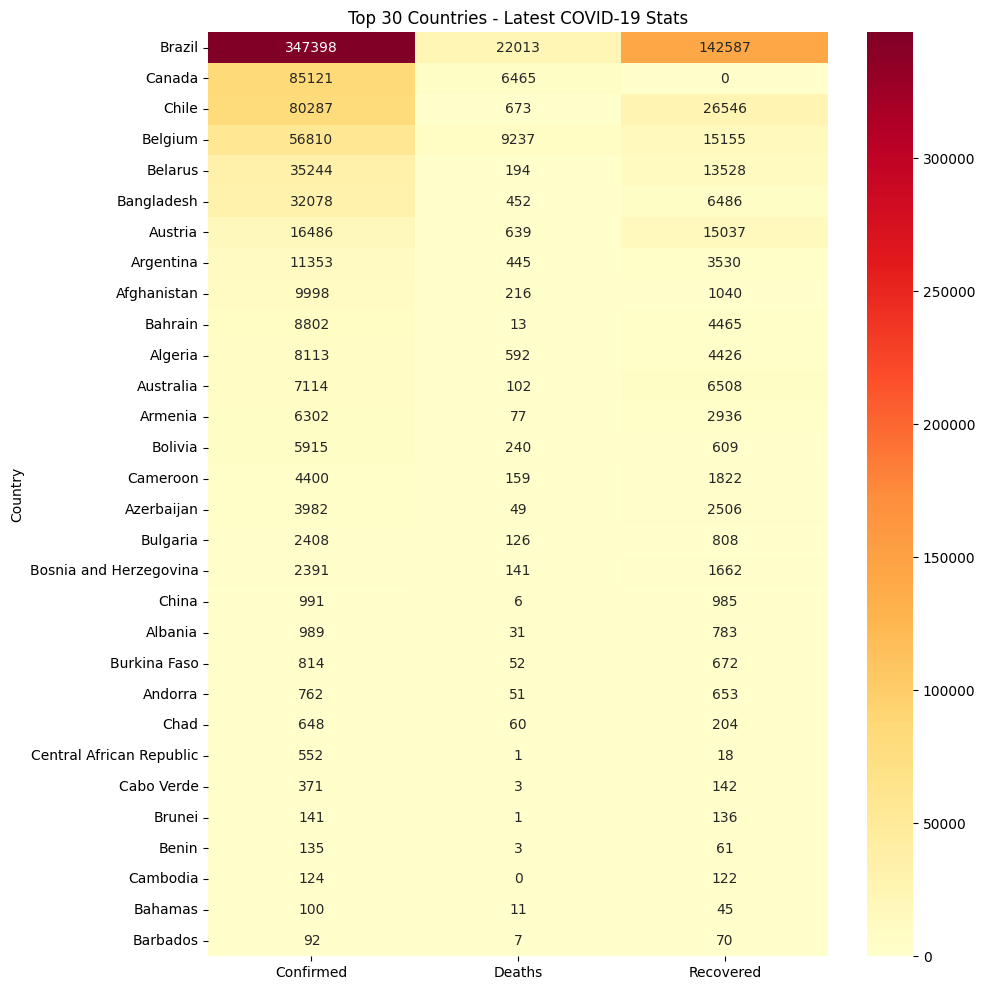

In [ ]:
latest = df[df['Date'] == df['Date'].max()]
pivot = latest.pivot_table(index='Country', values=['Confirmed', 'Deaths', 'Recovered'])
plt.figure(figsize=(10,12))
sns.heatmap(pivot.sort_values('Confirmed', ascending=False).head(30), annot=True, cmap='YlOrRd', fmt=".0f")
plt.title('Top 30 Countries - Latest COVID-19 Stats')
plt.show()
